# Decision Tree

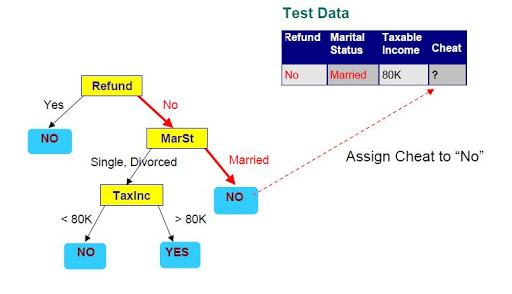



---



### Dataset

In [1]:
import pandas as pd

In [2]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=names, thousands=r',')

In [4]:
df

,buying,maint,doors,persons,lug_boot,safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
low,low,5more,more,med,med,good
low,low,5more,more,med,high,vgood
low,low,5more,more,big,low,unacc
low,low,5more,more,big,med,good




---



### Dataset Preprocessing

In [5]:
df = df.replace(['?'], pd.NA)

In [6]:
df = df.dropna(axis=0)

In [7]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [8]:
X = df.iloc[:, :-1]

In [9]:
Y = df.iloc[:, -1]

In [10]:
df

,buying,maint,doors,persons,lug_boot,safety
vhigh,3,0,0,2,1,2
vhigh,3,0,0,2,2,2
vhigh,3,0,0,2,0,2
vhigh,3,0,0,1,1,2
vhigh,3,0,0,1,2,2
...,...,...,...,...,...,...
low,1,3,2,1,2,1
low,1,3,2,1,0,3
low,1,3,2,0,1,2
low,1,3,2,0,2,1




---



### Modeling

split data into training set and test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

init model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decisionTree = DecisionTreeClassifier()

train model

In [30]:
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

make testing

In [31]:
predictions = decisionTree.predict(x_test)

evaluation

In [32]:
accuracy = decisionTree.score(x_test, y_test)
accuracy*100

74.30555555555556



---



### Real Testing

In [26]:
test_case = [1, 3, 2, 0, 2]

In [27]:
decisionTree.predict([test_case])

array([1], dtype=int8)